In [13]:
from tensorflow.keras.datasets import  imdb 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU

In [16]:
top_word=5000
(X,Y), (X_t,Y_t)=imdb.load_data(num_words=top_word)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
D:\anaconda\envs\mediapipe\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\anaconda\envs\mediapipe\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you m

In [26]:
len(X[1]),len(Y)

(189, 25000)

# vector size to fixed size

In [10]:
max_word=500
X_train=sequence.pad_sequences(X_train,maxlen=max_word)
X_test=sequence.pad_sequences(X_test,maxlen=max_word)


In [11]:
X_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [10]:
model = Sequential()
model.add(Embedding(5000,100,input_length=500))
model.add(GRU(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          500000    
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               60600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 560,701
Trainable params: 560,701
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
model.fit(X_train,Y_train,epochs=3,batch_size=64)

Epoch 1/3
391/391 [==============================] - 196s 499ms/step - loss: 0.5728 - accuracy: 0.6718
Epoch 2/3
391/391 [==============================] - 207s 529ms/step - loss: 0.2883 - accuracy: 0.8828
Epoch 3/3
391/391 [==============================] - 209s 535ms/step - loss: 0.2208 - accuracy: 0.9164


In [5]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.4.1
Num GPUs Available:  1


In [8]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [20]:
model.predict(X_test)

array([[0.06433952],
       [0.9877441 ],
       [0.4229815 ],
       ...,
       [0.11480588],
       [0.08470407],
       [0.70935804]], dtype=float32)

In [21]:
score = model.evaluate(X_test, Y_test)
score[0],score[1]

782/782 [==============================] - 24s 30ms/step - loss: 0.2887 - accuracy: 0.8816


(0.2887066602706909, 0.881600022315979)

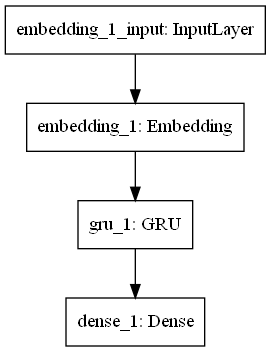

In [12]:
tf.keras.utils.plot_model(model, to_file='model.png')

In [26]:
model.save('my_model.h5') 

In [11]:
model.load_weights('my_model.h5')

In [15]:
list_1 = [[2,3,4]]
sequence.pad_sequences(list_1, maxlen=2)

array([[3, 4]])